In [2]:
# importing libraries

import pandas as pd
import seaborn as sbn
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [5]:
# importing the variable description dataset 
# that gives information about my dataset
VariableDescription= pd.read_csv('VariableDescription.csv')

In [6]:
VariableDescription

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [4]:
#importing the train_data dataset.

train_data= pd.read_csv('train_data.csv')

In [5]:
train_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


In [12]:
# this states how my dataset is stored
type(train_data)

pandas.core.frame.DataFrame

In [13]:
# to know how many features i have in the dataset,int,float, 
# object, null and non-null observed no null
#the shape of my dataset

train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 587.4+ KB


In [6]:
#Removing unimportant variables from the dataset

drop_colums = ['Geo_Code', 'Building Dimension', 'NumberOfWindows']

train_data = train_data.drop(drop_colums, axis=1)

In [7]:
#after removing unimportant variables

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 11 columns):
Customer Id          7160 non-null object
YearOfObservation    7160 non-null int64
Insured_Period       7160 non-null float64
Residential          7160 non-null int64
Building_Painted     7160 non-null object
Building_Fenced      7160 non-null object
Garden               7153 non-null object
Settlement           7160 non-null object
Building_Type        7160 non-null int64
Date_of_Occupancy    6652 non-null float64
Claim                7160 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 475.5+ KB


In [16]:
# Summary statistics of the dataset

train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,4.000000,2016.000000,1.000000


In [17]:
# including the object type inthe summary statistics

train_data.describe(include=object)

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement
count,7160,7160,7160,7153,7160
unique,7160,2,2,2,2
top,H442,V,N,O,R
freq,1,5382,3608,3602,3610


In [12]:
train_data.describe() .T

,count,mean,std,min,25%,50%,75%,max
YearOfObservation,7160.0,2013.669553,1.383769,2012.0,2012.000000,2013.0,2015.0,2016.0
Insured_Period,7160.0,0.909758,0.239756,0.0,0.997268,1.0,1.0,1.0
Residential,7160.0,0.305447,0.460629,0.0,0.000000,0.0,1.0,1.0
Building_Type,7160.0,2.186034,0.940632,1.0,2.000000,2.0,3.0,4.0
Date_of_Occupancy,6652.0,1964.456404,36.002014,1545.0,1960.000000,1970.0,1980.0,2016.0
Claim,7160.0,0.228212,0.419709,0.0,0.000000,0.0,0.0,1.0


In [18]:
train_data.dtypes

Customer Id           object
YearOfObservation      int64
Insured_Period       float64
Residential            int64
Building_Painted      object
Building_Fenced       object
Garden                object
Settlement            object
Building_Type          int64
Date_of_Occupancy    float64
Claim                  int64
dtype: object

In [19]:
train_data.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

In [20]:
train_data.select_dtypes(object).columns

Index(['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement'],
      dtype='object')

In [21]:
#Geting individual mean to better understand the dataset

train_data.mean()

YearOfObservation    2013.669553
Insured_Period          0.909758
Residential             0.305447
Building_Type           2.186034
Date_of_Occupancy    1964.456404
Claim                   0.228212
dtype: float64

In [22]:
# standard deviation of the dataset 

train_data.std()

YearOfObservation     1.383769
Insured_Period        0.239756
Residential           0.460629
Building_Type         0.940632
Date_of_Occupancy    36.002014
Claim                 0.419709
dtype: float64

In [23]:
train_data.quantile()

YearOfObservation    2013.0
Insured_Period          1.0
Residential             0.0
Building_Type           2.0
Date_of_Occupancy    1970.0
Claim                   0.0
Name: 0.5, dtype: float64

In [24]:
#Correlations of the dataset

train_data.corr()

,YearOfObservation,Insured_Period,Residential,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,0.025434,-0.040391,0.005490,-0.029492,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,-0.017811,-0.003445,0.088715
Residential,-0.040391,-0.037620,1.000000,0.334039,-0.042058,0.063509
Building_Type,0.005490,-0.017811,0.334039,1.000000,-0.146608,0.112168
Date_of_Occupancy,-0.029492,-0.003445,-0.042058,-0.146608,1.000000,0.019170
Claim,-0.016367,0.088715,0.063509,0.112168,0.019170,1.000000


In [25]:
# correlation between yearofobservation and targetvariable claim

train_data[['YearOfObservation', 'Claim']].corr()      
                   

,YearOfObservation,Claim
YearOfObservation,1.000000,-0.016367
Claim,-0.016367,1.000000


In [26]:
#sorting out the data by target variable which is Claim

train_data_sort = train_data.sort_values(by='Claim', ascending=False)

train_data_sort

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,Date_of_Occupancy,Claim
6206,H5237,2013,1.0,1,N,V,V,U,1,1960.0,1
1570,H3880,2015,1.0,0,V,V,V,U,2,1980.0,1
1568,H3866,2015,1.0,0,V,N,O,R,2,1970.0,1
4746,H15349,2012,1.0,0,V,N,O,R,1,2004.0,1
5963,H15430,2013,1.0,0,V,N,O,R,1,1996.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2690,H5615,2016,1.0,0,V,V,V,U,1,1960.0,0
2688,H4549,2015,1.0,0,V,N,O,R,1,2000.0,0
2687,H4548,2012,1.0,0,V,N,O,R,1,2000.0,0
2686,H291,2012,1.0,0,V,V,V,U,1,1960.0,0


(array([5526.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1634.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

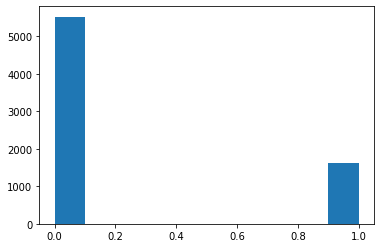

In [27]:
#Plotting histogram for continuous numerical variable Claim

num_of_bins=10

plt.hist(train_data['Claim'],num_of_bins)

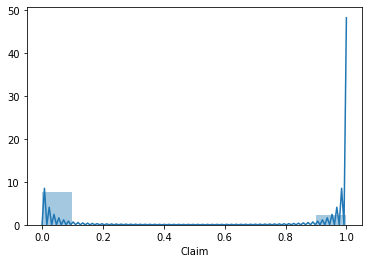

In [28]:
#using seaborn to get the  probability density function

sbn.distplot(train_data['Claim'],bins=10)

(array([ 250.,   98.,   94.,   60.,  141.,   93.,   76.,  148.,  121.,
        6079.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

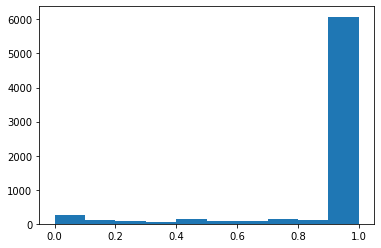

In [29]:
#Plotting histogram for continuous numerical variable insured period

num_of_bins=10

plt.hist(train_data['Insured_Period'],num_of_bins)

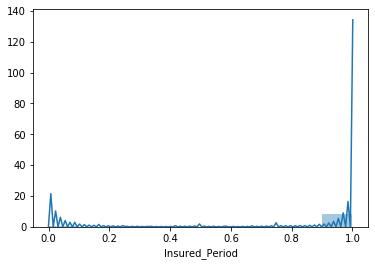

In [30]:
#using seaborn to get the  probability density function

sbn.distplot(train_data['Insured_Period'],bins=10)

In [31]:
#Selecting the colums that are numeric that is, float64 and int64

train_data.select_dtypes("number")

,YearOfObservation,Insured_Period,Residential,Building_Type,Date_of_Occupancy,Claim
0,2013,1.000000,0,1,1960.0,0
1,2015,1.000000,0,1,1850.0,0
2,2014,1.000000,0,1,1960.0,0
3,2013,1.000000,0,1,1960.0,0
4,2014,1.000000,0,1,1800.0,0
...,...,...,...,...,...,...
7155,2012,1.000000,1,1,2001.0,0
7156,2013,1.000000,0,2,1980.0,1
7157,2016,0.038251,0,1,1992.0,0
7158,2013,1.000000,0,1,1972.0,0


In [32]:
#Using groupby for cross tabulation to count categorical variables 
making_distri = train_data.groupby('Customer Id').size()

In [35]:
making_distri

Customer Id
H12608    1
H12616    1
H12617    1
H12619    1
H12621    1
         ..
H7473     1
H7474     1
H7475     1
H7477     1
H7478     1
Length: 7160, dtype: int64

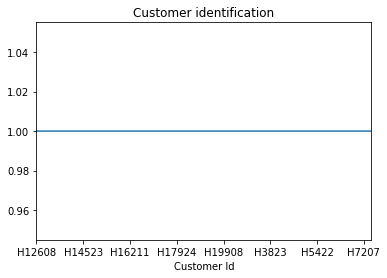

In [33]:
making_distri.plot(title='Customer identification')

In [34]:
# selecting all numerical variables

train_data_num = train_data.select_dtypes(include=['float64', 'int64'])

train_data_num

,YearOfObservation,Insured_Period,Residential,Building_Type,Date_of_Occupancy,Claim
0,2013,1.000000,0,1,1960.0,0
1,2015,1.000000,0,1,1850.0,0
2,2014,1.000000,0,1,1960.0,0
3,2013,1.000000,0,1,1960.0,0
4,2014,1.000000,0,1,1800.0,0
...,...,...,...,...,...,...
7155,2012,1.000000,1,1,2001.0,0
7156,2013,1.000000,0,2,1980.0,1
7157,2016,0.038251,0,1,1992.0,0
7158,2013,1.000000,0,1,1972.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x059C5DD0>,
      dtype=object)

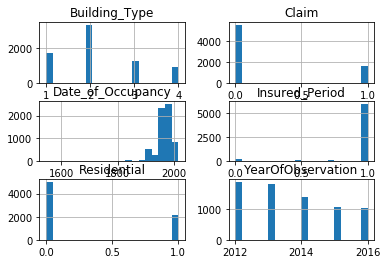

In [35]:
#plotting histogram of all numerical variables

train_data_num.hist(bins=20)

In [36]:
#correlation with the target variable

train_data_corre = train_data_num.corr()['Claim'][:-1]

In [37]:
train_data_corre

YearOfObservation   -0.016367
Insured_Period       0.088715
Residential          0.063509
Building_Type        0.112168
Date_of_Occupancy    0.019170
Name: Claim, dtype: float64

In [ ]:
#boxplot of categorical variable

boxplt1 = sbn.boxplot(x='Customer Id', y='Claim', data=train_data)


In [ ]:
#boxplot of categorical variable

boxplt2 = sbn.boxplot(x='Settlement', y='Claim', data=train_data)


In [ ]:
#boxplot of categorical variable

boxplt3 = sbn.boxplot(x='Building_Fenced', y='Claim', data=train_data)


In [ ]:
#boxplot of categorical variable

boxplt4 = sbn.boxplot(x='Garden', y='Claim', data=train_data)


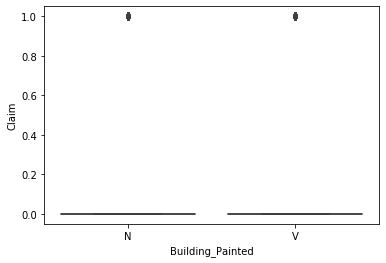

In [43]:
#boxplot of categorical variable

boxplt5 = sbn.boxplot(x='Building_Painted', y='Claim', data=train_data)


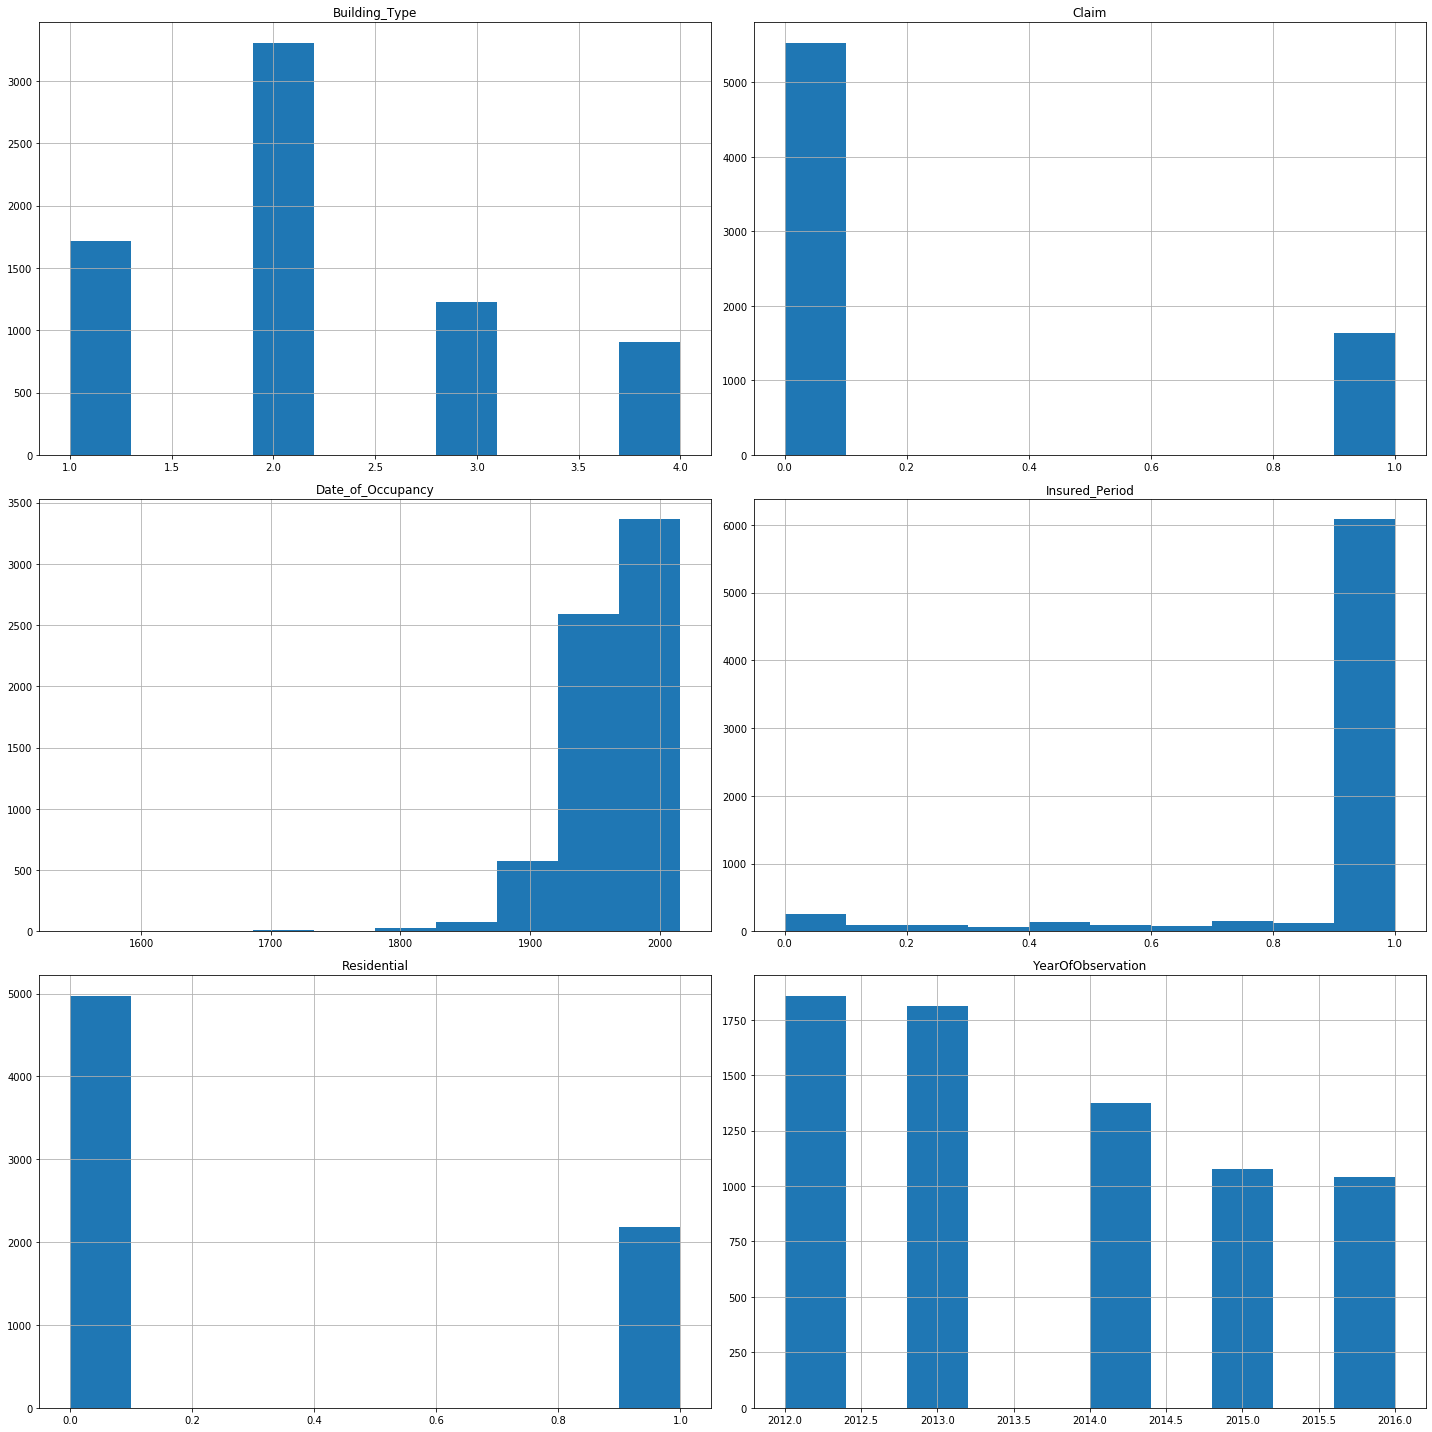

In [8]:
#histogram of  the dataset

train_data.hist(figsize=(20,20))
#setting a large fig size because the dataset is many
plt.tight_layout()
plt.show()

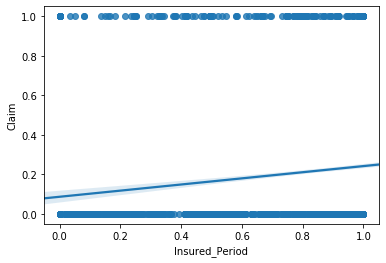

In [9]:
#creating regression plot to determine the relationship between targetvariable
# and other variable

sbn.regplot(train_data['Insured_Period'],train_data['Claim'])